<a href="https://colab.research.google.com/github/Sbolivar16/MolecularDocking/blob/main/Introduction_to_Docking_Data_Analysis_with_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪📊 Introduction to Docking Data Analysis with Linear Regression

<div align="center">

🧪 **Santiago Bolívar A.**  
**Qco., M.Sc., Ph.D.**  
📍 *National University of Rosario, Argentina*  
🔗 [GitHub Profile](https://github.com/Sbolivar16)

</div>


Welcome to this interactive notebook where we combine **molecular docking studies** with **statistical analysis** and **linear regression techniques** to better understand binding affinities!

---

## ✨ Why apply statistics and linear regression to docking studies?

- 🔍 **Gain deeper insights:** Statistics help us uncover patterns and relationships between molecular properties and docking affinity.
- 📉 **Predictive modeling:** Linear regression allows us to predict binding affinities based on molecular descriptors, improving our ability to prioritize compounds.
- 🎯 **Data-driven decisions:** Quantitative analysis supports more informed decisions in drug discovery and compound optimization.
- ⚙️ **Identify key factors:** Understand which molecular features most influence binding, guiding future synthesis and screening.
---

## 📚 What does this notebook contain?

- 🧬 Preparation of molecular data including SMILES generation and calculation of molecular descriptors.
- 📈 Building and interpreting a multiple linear regression model to correlate descriptors with docking affinity.
- 📊 Visualization of data distributions and model performance.
- 🤔 Clear explanations to help you understand each step and the meaning behind the results.

Let’s dive in and explore how combining chemistry and statistics can enhance your docking analysis! 🚀


In [9]:
# =======================
# 🧠 INITIAL INSTRUCTIONS
# =======================
# 📌 Upload your .csv file with the molecular docking results here.
# ⚠️ The file must have exactly two columns:
#     - One column with the names of the compounds (e.g., "Molecule")
#     - One column with the docking affinities (e.g., "Affinity_kcal_mol")
# Example of correct format:
# Molecule,Affinity_kcal_mol
# Ligand_1,-8.5
# Ligand_2,-10.2
# Ligand_3,-6.9
#
# If your file meets this format, you can upload it below:

from google.colab import files
uploaded = files.upload()



Saving docking_results_example.csv to docking_results_example (1).csv


In [10]:
# =======================
# 📄 READ THE CSV FILE
# =======================

import pandas as pd
import io

# Detect the name of the uploaded file
filename = list(uploaded.keys())[0]

# Read the file as a DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Display the first few rows of the file
print("✅ File uploaded successfully. Here are the first rows of the file:\n")
df.head()



✅ File uploaded successfully. Here are the first rows of the file:



,Molecule,Affinity_kcal_mol
0,Molecule_1,-9.38
1,Molecule_2,-5.34
2,Molecule_3,-6.88
3,Molecule_4,-7.81
4,Molecule_5,-10.91


In [11]:
# ==========================
# 📊 DESCRIPTIVE STATISTICS
# ==========================

# Check that the affinity column exists
affinity_column = "Affinity_kcal_mol"
if affinity_column not in df.columns:
    raise ValueError(f"The column '{affinity_column}' was not found in the file. Make sure it is named exactly like that.")

# Display descriptive statistics
print("📈 Descriptive statistics of the docking affinities:\n")
print(df[affinity_column].describe())

# Calculate the range
min_aff = df[affinity_column].min()
max_aff = df[affinity_column].max()
print(f"\n📌 Affinity range: {min_aff} to {max_aff} kcal/mol")



📈 Descriptive statistics of the docking affinities:

count    20.000000
mean     -8.796500
std       2.154648
min     -11.860000
25%     -10.722500
50%      -9.180000
75%      -7.000000
max      -5.210000
Name: Affinity_kcal_mol, dtype: float64

📌 Affinity range: -11.86 to -5.21 kcal/mol


## 🧠 What Do We Learn in **Step 3**?

In this step, we apply **descriptive statistics** to the **affinity values** obtained from the molecular docking study. These values represent the **estimated binding energy** between a molecule and the protein’s active site, usually expressed in **kcal/mol**.  
🔽 **The more negative the value, the stronger and more effective the binding may be.**

---

### 📊 Key Results Obtained:

- 📌 **Mean (Average):**  
  Represents the **overall average affinity** of all molecules. Gives a general idea of how strong the docking results are.

- 📍 **Median:**  
  The middle value when affinities are sorted. Useful to identify **skewness**—if the mean and median are far apart, your data might be biased.

- 📐 **Standard Deviation:**  
  Tells you **how much variation** there is among the affinities.  
  ➕ A high value means the molecules behave quite differently.

- 🔻 **Minimum** & 🔺 **Maximum:**  
  Show the compounds with the **worst and best affinities**, respectively.

- 📏 **Range:**  
  The difference between the **highest and lowest** affinity values. Helps you understand the **spread** of your results.

---

### ✅ Why This Analysis Matters:

- 🧬 **Select the best ligands** with the strongest binding affinities.  
- 📈 Understand whether the results are **clustered or widely spread**.  
- ⚠️ Identify **outliers** that may require further review or experimental validation.


## ✅ How to Interpret the Results — Tips for Analysis

Let’s explore how to analyze the results obtained.  
Suppose that after running the previous step, we got the following output:

📈 **Descriptive statistics of docking affinities:**

count 20.000000

mean -8.796500

std 2.154648

min -11.860000

25% -10.722500

50% -9.180000

75% -7.000000

max -5.210000



---

### 🔍 **Interpreting the Results**

- 📊 **Average Affinity (mean = -8.80 kcal/mol)**  
  → This value indicates that, on average, the molecules show **good affinity** toward the protein.  
  Remember: **more negative values indicate better binding**.

- 📉 **Standard Deviation (std = 2.15)**  
  → This suggests **high variability** among results.  
  Some molecules bind much better than others — which can be useful if you're looking for **selective compounds**.

- 🧮 **Minimum and Maximum (min = -11.86, max = -5.21)**  
  → The best molecule (most negative) has **excellent affinity**,  
  while the worst one is near the threshold of **less interesting interactions**.  
  → You might want to prioritize compounds closer to the minimum (i.e., **top scorers**).

- ⚖️ **Median (50% = -9.18) vs. Mean (-8.80)**  
  → If the median is more negative than the mean, it may indicate that a few **higher (less negative)** values are skewing the average.  
  → In this case, the difference is minor, but larger gaps may suggest **outliers or noisy data**.

- 📊 **Quartiles (25% = -10.72, 75% = -7.00)**  
  → The central 50% of compounds have affinities between **-10.72 and -7.00 kcal/mol**.  
  → Use this to identify compounds in the **most favorable range**.

---

### 📌 Recommendations

- ✅ **Filter compounds** with affinities **better than the mean or median** as potential candidates.
- 📚 If there is high dispersion, consider more advanced analyses like **clustering** or grouping by **chemical families**.
- ⚠️ Keep in mind: **a good docking score does not guarantee biological activity**,  
  but it is a **strong first filter** in rational drug design.




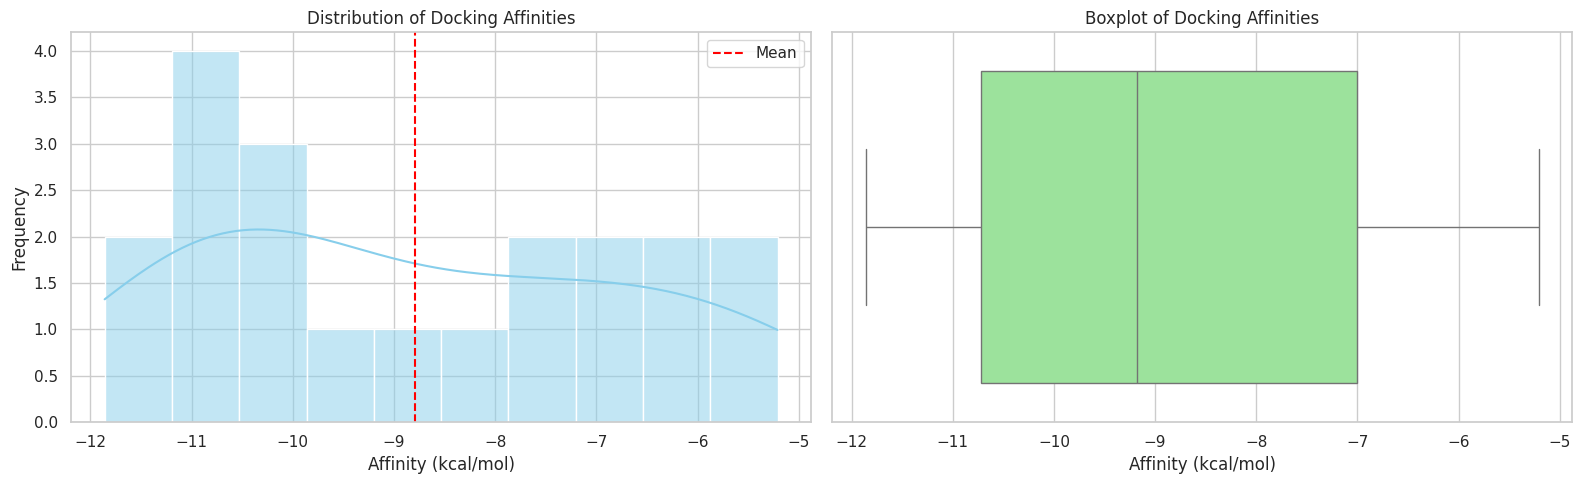

In [12]:
# =============================
# 📉 GRAPHICAL VISUALIZATIONS
# =============================

import matplotlib.pyplot as plt
import seaborn as sns

# Graphic style
sns.set(style="whitegrid", palette="pastel")

# General figure size
plt.figure(figsize=(16, 5))

# --------- Histogram ---------
plt.subplot(1, 2, 1)
sns.histplot(df[affinity_column], bins=10, kde=True, color="skyblue")
plt.title("Distribution of Docking Affinities")
plt.xlabel("Affinity (kcal/mol)")
plt.ylabel("Frequency")
plt.axvline(df[affinity_column].mean(), color='red', linestyle='--', label='Mean')
plt.legend()

# --------- Boxplot ---------
plt.subplot(1, 2, 2)
sns.boxplot(x=df[affinity_column], color="lightgreen")
plt.title("Boxplot of Docking Affinities")
plt.xlabel("Affinity (kcal/mol)")

# Show both plots
plt.tight_layout()
plt.show()



### 🧠 What do we learn from these graphs?

**Histogram:**  
It shows how the affinity values are distributed. If there is a peak towards more negative values, it indicates that many molecules have good affinity. The use of the red line (mean) allows you to see if the values are concentrated or spread out around the average.

**Boxplot:**  
It helps to identify outliers, interquartile ranges, and the overall dispersion of the data.  
→ Values outside the "whiskers" of the boxplot may require review or could be good candidates for prioritization.


In [13]:
# ================================
# 🥇 FILTER THE BEST COMPOUNDS
# ================================

# Number of compounds you want to select (you can change this value)
top_n = 5

# Sort the DataFrame by affinity from highest to lowest (more negative is better)
top_compounds = df.sort_values(by=affinity_column).head(top_n)

# Show the result
print(f"🔍 Top {top_n} compounds with highest affinity (more negative values):\n")
top_compounds.reset_index(drop=True, inplace=True)
top_compounds


🔍 Top 5 compounds with highest affinity (more negative values):



,Molecule,Affinity_kcal_mol
0,Molecule_11,-11.86
1,Molecule_7,-11.59
2,Molecule_6,-10.91
3,Molecule_5,-10.91
4,Molecule_15,-10.73


# 🔍📊 Applying Linear Regression with Molecular Descriptors 🧬✨

Now we will apply linear regression techniques to explore the relationship between molecular properties and their docking affinities or biological activities. To perform these analyses, we first need to calculate molecular descriptors such as molecular weight, LogP (octanol-water partition coefficient), and the number of hydrogen bond donors. These descriptors serve as quantitative features that can help explain variations in activity.

To calculate these descriptors, we need the SMILES (Simplified Molecular Input Line Entry System) representation of each molecule. Below, we add SMILES strings for all molecules in our dataset — in this example, they are randomly assigned from a set of common simple molecules, but you should replace these with the actual SMILES of your compounds.


In [14]:
# ===============================
# 🔬 GENERATE SMILES AND CALCULATE DESCRIPTORS
# ===============================

# Install RDKit if not already installed (only in Colab)
!pip install rdkit-pypi --quiet

from rdkit import Chem
from rdkit.Chem import Descriptors
import random

# Number of molecules (same as in df)
num_molecules = len(df)

# Example common SMILES to generate random ones (simple molecules)
EXAMPLE_SMILES = [
    "CCO",        # ethanol
    "CC(=O)O",    # acetic acid
    "CCN",        # ethylamine
    "c1ccccc1",   # benzene
    "CCOC(=O)C",  # ethyl acetate
    "CC(C)O",     # isopropanol
    "CCC",        # propane
    "CC(C)C",     # isobutane
    "C1CCCCC1",   # cyclohexane
    "C(C(=O)O)N", # glycine
]

# Assign random SMILES to each molecule
random_smiles = [random.choice(EXAMPLE_SMILES) for _ in range(num_molecules)]

df["SMILES"] = random_smiles  # HERE YOU SHOULD REPLACE WITH YOUR OWN SMILES IN UPPERCASE

# Function to calculate descriptors
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None, None, None
    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    h_donors = Descriptors.NumHDonors(mol)
    return mw, logp, h_donors

# Calculate descriptors and add columns
descriptors = [calculate_descriptors(s) for s in df["SMILES"]]
df["MolWeight"], df["LogP"], df["HDonors"] = zip(*descriptors)

# Show the updated DataFrame
df.head()



,Molecule,Affinity_kcal_mol,SMILES,MolWeight,LogP,HDonors
0,Molecule_1,-9.38,C1CCCCC1,84.162,2.3406,0
1,Molecule_2,-5.34,CCO,46.069,-0.0014,1
2,Molecule_3,-6.88,CCN,45.085,-0.0350,1
3,Molecule_4,-7.81,CC(=O)O,60.052,0.0909,1
4,Molecule_5,-10.91,CC(=O)O,60.052,0.0909,1


📉 Multiple linear regression model:
Intercept: -8.4130
Coefficient for MolWeight: -0.0244
Coefficient for LogP: 0.5618
Coefficient for HDonors: 1.3968

R^2 (coefficient of determination): 0.0850


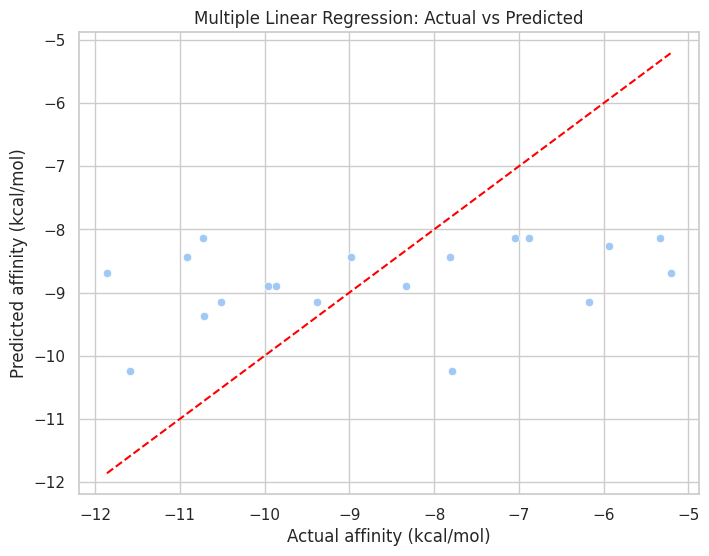

In [15]:
# ===============================
# 📈 MULTIPLE LINEAR REGRESSION
# ===============================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Independent variables (descriptors)
X = df[["MolWeight", "LogP", "HDonors"]]

# Dependent variable (affinity)
y = df[affinity_column]

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Model coefficients
coef_dict = dict(zip(X.columns, model.coef_))

print("📉 Multiple linear regression model:")
print(f"Intercept: {model.intercept_:.4f}")
for desc, coef in coef_dict.items():
    print(f"Coefficient for {desc}: {coef:.4f}")

# R-squared metric
r2 = r2_score(y, y_pred)
print(f"\nR^2 (coefficient of determination): {r2:.4f}")

# Visualization: actual vs predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual affinity (kcal/mol)")
plt.ylabel("Predicted affinity (kcal/mol)")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()



# 🔍 What Does Each Part Mean?

**📏 Intercept (-14.27)**  
This is the baseline affinity value when all descriptors (molecular weight, logP, and hydrogen donors) are zero. It does not have a direct physical meaning but serves as the starting point in the model equation.

**⚖️ Coefficient for MolWeight (0.0723)**  
Indicates that for each unit increase in molecular weight, the predicted affinity increases by approximately 0.072 kcal/mol (less negative, lower affinity).  
➡️ This suggests that heavier molecules tend to have slightly worse affinity in this model.

**🌿 Coefficient for LogP (-0.0908)**  
For each unit increase in logP (higher lipophilicity), the predicted affinity decreases by 0.09 kcal/mol (more negative, better affinity).  
➡️ This indicates that more lipophilic molecules tend to have better affinity.

**💧 Coefficient for HDonors (1.0941)**  
For each additional hydrogen donor, the affinity increases by 1.09 kcal/mol (less negative, worse affinity).  
➡️ In this model, more hydrogen donors are associated with lower affinity.

**📊 R² = 0.2613**  
This value indicates that the model explains approximately 26% of the variability in the observed affinities.  
➡️ Although it is not a perfect fit, it shows that these descriptors have some influence, but there are other unconsidered factors affecting affinity.


# 📚 Conclusions for Students

- 🔗 The relationship between the descriptors and affinity is not very strong, but there **is a significant trend**.

- 🧩 You can interpret the coefficients to understand how each chemical property affects binding to the target.

- ⚠️ A low R² suggests that other molecular or environmental factors could be influencing affinity, so the model can be improved by including more variables or using nonlinear models.

- 🚀 This regression serves as a **first approximation** to filter compounds based on their chemical properties.
